# Steps Performed : 

1. Feature Scaling 
2. Dimensionality reduction using PCA
3. Machine Learning Models with evaluation report

# Pre-requisite:
    Ensure datafolder and required csv datafile is in place before running the code. 
    If you are runnig this notebook into Jupyter notebook, ensure to mount the drive and file exists on the drive

In [1]:
#Modify the directory & File name based on your local paths & file name
dataFolder = "C:/Users/shaaruns.CORPDOM/Documents/BITS_Assignments/Module-7/Gr20_Cap4_Sourcecode/Grp20_Cohert3_Final_Submission"
datafile = "Output_CSV/Dataset_Step4_Processed_Data_Revised.csv"

In [2]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [3]:
import pandas as pd
print('pandas  : {}'.format(pd.__version__)) #Rationale 
import numpy as np
print ('numpy   : {}'.format(np.__version__))
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


pandas  : 0.25.1
numpy   : 1.19.4


In [4]:
#Read the dataset from clean datafile

df_train = pd.read_csv(dataFolder+'/'+ datafile)
df_train.head()

#Read the dataset from GDrive
#Inputfile = 'drive/My Drive/Capstone_Files/Dataset_wrangling_Part_4_Post_Review.csv'
#df_train = pd.read_csv(Inputfile)
#df_train.head()



,Consumerdisputed,ComplaintID,Month_Received,Year_Sent,Month_Sent,Day_Sent,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,...,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118
0,1,1347613,4,2015,4,26,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0
1,1,1685130,12,2015,12,7,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,1,10631,1,2012,1,9,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,1,1489180,7,2015,7,27,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,1,795636,4,2014,4,6,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [5]:
df_train.rename(columns = {'Complaint ID':'ComplaintID'}, inplace = True)

# Feature Scaling of train Data Sets except Target and Indent variable

In [6]:
df_train.shape

(100311, 142)

In [7]:
temp = df_train.copy()

In [8]:
colsTobedropped = ['Consumerdisputed', 
                  'ComplaintID'
                   ]



temp  = temp.drop(colsTobedropped,axis = 1)
print(temp.columns)

Index(['Month_Received', 'Year_Sent', 'Month_Sent', 'Day_Sent',
       'Week_Received', 'Product_Consumer Loan', 'Product_Credit card',
       'Product_Credit reporting', 'Product_Debt collection',
       'Product_Mortgage',
       ...
       'Feature109', 'Feature110', 'Feature111', 'Feature112', 'Feature113',
       'Feature114', 'Feature115', 'Feature116', 'Feature117', 'Feature118'],
      dtype='object', length=140)


In [9]:
temp.shape

(100311, 140)

In [10]:
scaledCols = temp.columns

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[scaledCols] = scaler.fit_transform(df_train[scaledCols])

In [12]:
df_train.shape

(100311, 142)

In [13]:
#Final X training Data
X = df_train.reindex(columns=scaledCols)

#Target Y Variable Consumer disputed as 0 or 1
y = df_train['Consumerdisputed'].values

#Preserving ComplaintID for providing final output results, will not be used for training data
p_ComplaintID = df_train['ComplaintID'].values

# Dimensional reduction and features selection

# Using PCA

In [14]:
pca_columns = []
for i in range(X.shape[1]):
    pca_columns.append('PC' + str(i+1))
    
pca_model = PCA()
pca_model.fit(X)
X_pca_train = pd.DataFrame(pca_model.transform(X), columns = pca_columns)


In [15]:
explained_info_train = pd.DataFrame(pca_model.explained_variance_ratio_, columns=['Explained Info']).sort_values(by = 'Explained Info', ascending = False)
imp = []
for i in range(explained_info_train.shape[0]):
    imp.append(explained_info_train.head(i).sum())
explained_info_train_sum = pd.DataFrame()
explained_info_train_sum['Variable'] = pca_columns
explained_info_train_sum['Importance'] = imp
explained_info_train_sum.head(60)

,Variable,Importance
0,PC1,Explained Info 0.0 dtype: float64
1,PC2,Explained Info 0.204761 dtype: float64
2,PC3,Explained Info 0.31747 dtype: float64
3,PC4,Explained Info 0.401489 dtype: float64
4,PC5,Explained Info 0.471021 dtype: float64
5,PC6,Explained Info 0.527071 dtype: float64
6,PC7,Explained Info 0.568048 dtype: float64
7,PC8,Explained Info 0.608649 dtype: float64
8,PC9,Explained Info 0.64717 dtype: float64
9,PC10,Explained Info 0.678818 dtype: float64


# Retaining 18 principal components to retain 90% data variance

In [16]:
pca_columns = []
for i in range(25):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA(n_components = 25)
pca_model.fit(X)
df_pca_train = pd.DataFrame(pca_model.transform(X), columns = pca_columns)

In [17]:
df_pca_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-0.395199,0.204979,0.348880,-0.534124,-0.400318,-0.603641,0.152747,-0.255859,0.222265,0.291854,...,-0.511882,-0.706588,-0.034723,0.032472,0.213880,-0.163613,0.006538,-0.093970,-0.039530,-0.010609
1,-0.450109,0.300232,0.570239,-0.731279,-0.371584,0.503156,-0.586397,0.568686,-0.363829,-0.102479,...,-0.023017,0.044513,0.475766,-0.155911,-0.071593,-0.069824,-0.235035,0.151858,-0.074929,-0.029439
2,0.050268,0.258965,0.237108,-0.552120,0.721765,0.282272,-0.619973,-0.643885,1.836436,-0.939509,...,-0.112445,0.074300,-0.494546,0.196671,0.031203,0.006907,0.098852,-0.045058,-0.048895,0.012688
3,-0.045776,0.248927,0.260345,-0.566060,0.656803,-0.620803,0.042442,0.187712,0.520281,-0.220983,...,-0.083403,0.145307,1.404238,-0.634033,-0.921333,-0.187751,-0.024251,0.150833,-0.103045,-0.092548
4,1.451888,-0.846634,-0.160931,-0.571713,-0.074824,0.620269,-0.052431,-0.357547,-0.100975,-0.046934,...,-0.005213,-0.052919,-0.004768,0.011288,0.040054,-0.005465,-0.007769,-0.011862,0.025234,-0.040595


In [18]:
# Split the dataframe 80:20 preserve the distribution of class - use stratify

X_train, X_val, y_train, y_val , trainComplaintID , valComplaintID = train_test_split(df_pca_train, y, p_ComplaintID , test_size = 0.3,random_state = 17 , stratify = df_train['Consumerdisputed'])


In [19]:
valComplaintID

array([ 535735,  336747,  964230, ..., 1038166,  582650, 1048379],
      dtype=int64)

In [20]:
X_train.shape, y_train.shape, trainComplaintID.shape 

((70217, 25), (70217,), (70217,))

In [21]:
 X_val.shape, y_val.shape,  valComplaintID.shape

((30094, 25), (30094,), (30094,))

In [22]:
#checking y_train distribution
print("y_train distribution of label '1': {} \n".format(sum(y_train == 1))) 
print("y_train distribution of label '0': {} \n".format(sum(y_train == 0)))


#checking y_train distribution
print("y_val distribution of label '1': {} \n".format(sum(y_val == 1))) 
print("y_val distribution of label '0': {} \n".format(sum(y_val == 0)))


y_train distribution of label '1': 21474 

y_train distribution of label '0': 48743 

y_val distribution of label '1': 9203 

y_val distribution of label '0': 20891 



In [23]:
totalFeature = X_train.columns
len(totalFeature)

25

In [24]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [25]:
def plot_roc_curve(model, yTest, yPred):
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    roc_auc = auc(fpr, tpr)
    lw = 2
    #print('AUC area:', roc_auc)
    Model_accuracy[model] = roc_auc_score(yTest,yPred)
    print('AUC roc_auc_score:', roc_auc_score(yTest,yPred))
    plt.plot([0,1],[0,1],'k--')
    #plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(model)
    plt.show()
    
from sklearn.metrics import cohen_kappa_score
def getModelReport(modelName, yTest, yPredict) :
    accuracy = accuracy_score(yTest, yPredict)
    precision = precision_score(yTest, yPredict)
    recall = recall_score(yTest, yPredict)
    f1 = f1_score(yTest, yPredict)
    # Cohen's kappa
    cohenKappa = cohen_kappa_score(yTest, yPredict)
    conf_matrix = confusion_matrix(yTest, yPredict)
    clf_report = classification_report(yTest, yPredict)

    print('\n\n*************************************************************************************')
    print('FOR {0}:'.format(modelName))
    print('ACCURACY:', accuracy)
    print('F1 SCORE:', f1)
    print('CONFUSION MATRIX: ')
    print(conf_matrix)
    print('CLASSIFICATION REPORT: ')
    print(clf_report)
    print('COHEN KAPPA SCORE: ')
    print (cohenKappa)
    #print ("{0:.3f}".format(cohenKappa))
    print('****************************************************************************************')


C:\Users\shaaruns.CORPDOM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaaruns.CORPDOM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaaruns.CORPDOM\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif



*************************************************************************************
FOR LogisticRegression():
ACCURACY: 0.6941915331959859
F1 SCORE: 0.0
CONFUSION MATRIX: 
[[20891     0]
 [ 9203     0]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.69      1.00      0.82     20891
           1       0.00      0.00      0.00      9203

    accuracy                           0.69     30094
   macro avg       0.35      0.50      0.41     30094
weighted avg       0.48      0.69      0.57     30094

COHEN KAPPA SCORE: 
0.0
****************************************************************************************
AUC roc_auc_score: 0.5


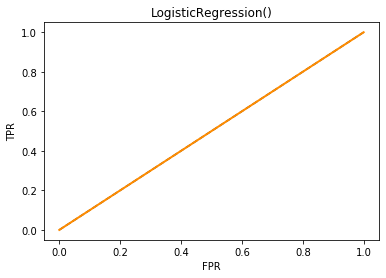



*************************************************************************************
FOR DecisionTreeClassifier():
ACCURACY: 0.6088589087525753
F1 SCORE: 0.29426224593800593
CONFUSION MATRIX: 
[[15869  5022]
 [ 6749  2454]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.70      0.76      0.73     20891
           1       0.33      0.27      0.29      9203

    accuracy                           0.61     30094
   macro avg       0.51      0.51      0.51     30094
weighted avg       0.59      0.61      0.60     30094

COHEN KAPPA SCORE: 
0.027716546360121663
****************************************************************************************
AUC roc_auc_score: 0.5131307899074707


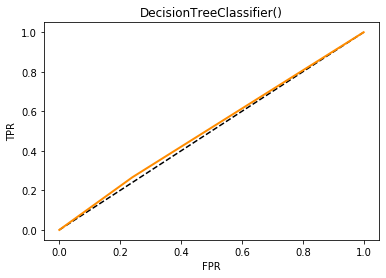



*************************************************************************************
FOR RandomForestClassifier():
ACCURACY: 0.6246095567222703
F1 SCORE: 0.28286675553862756
CONFUSION MATRIX: 
[[16569  4322]
 [ 6975  2228]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.70      0.79      0.75     20891
           1       0.34      0.24      0.28      9203

    accuracy                           0.62     30094
   macro avg       0.52      0.52      0.51     30094
weighted avg       0.59      0.62      0.60     30094

COHEN KAPPA SCORE: 
0.03830021000562578
****************************************************************************************
AUC roc_auc_score: 0.5176058110680225


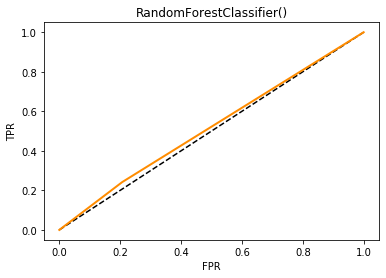



*************************************************************************************
FOR AdaBoostClassifier():
ACCURACY: 0.6945238253472453
F1 SCORE: 0.008627197239296884
CONFUSION MATRIX: 
[[20861    30]
 [ 9163    40]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.69      1.00      0.82     20891
           1       0.57      0.00      0.01      9203

    accuracy                           0.69     30094
   macro avg       0.63      0.50      0.41     30094
weighted avg       0.66      0.69      0.57     30094

COHEN KAPPA SCORE: 
0.0040288257858903664
****************************************************************************************
AUC roc_auc_score: 0.5014551918485871


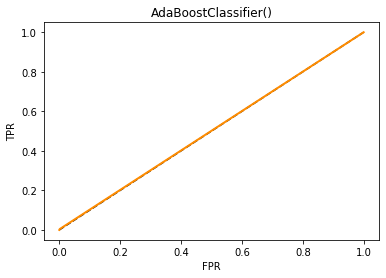



*************************************************************************************
FOR GradientBoostingClassifier():
ACCURACY: 0.6962185153186682
F1 SCORE: 0.018888173427774203
CONFUSION MATRIX: 
[[20864    27]
 [ 9115    88]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     20891
           1       0.77      0.01      0.02      9203

    accuracy                           0.70     30094
   macro avg       0.73      0.50      0.42     30094
weighted avg       0.72      0.70      0.58     30094

COHEN KAPPA SCORE: 
0.011426026295253466
****************************************************************************************
AUC roc_auc_score: 0.5041348383705632


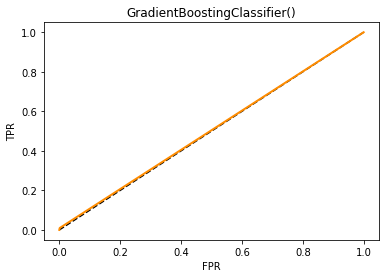



*************************************************************************************
FOR KNeighborsClassifier():
ACCURACY: 0.6399946833255798
F1 SCORE: 0.26559110629067245
CONFUSION MATRIX: 
[[17301  3590]
 [ 7244  1959]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.70      0.83      0.76     20891
           1       0.35      0.21      0.27      9203

    accuracy                           0.64     30094
   macro avg       0.53      0.52      0.51     30094
weighted avg       0.60      0.64      0.61     30094

COHEN KAPPA SCORE: 
0.0461464416292201
****************************************************************************************
AUC roc_auc_score: 0.5205105175534991


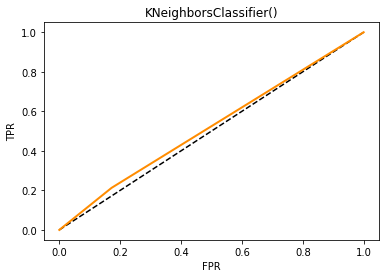



*************************************************************************************
FOR XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None):
ACCURACY: 0.6920316342127999
F1 SCORE: 0.10884615384615384
CONFUSION MATRIX: 
[[20260   631]
 [ 8637   566]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.70      0.97      0.81     20891
           1       0.47      0.06      0.11      9203

    accuracy                

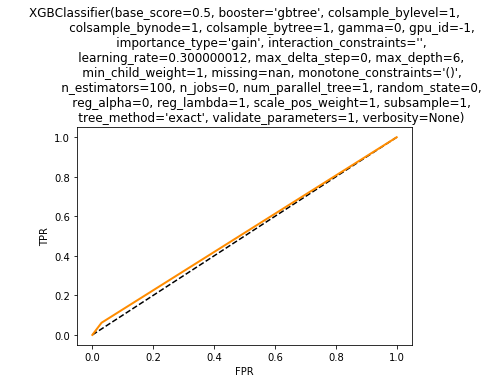

,Modelling Algorithm,Train Accuracy,Validation Accuracy,Difference
4,GradientBoostingClassifier,0.697709,0.696219,0.213559
3,AdaBoostClassifier,0.694931,0.694524,0.058653
0,LogisticRegression,0.694177,0.694192,0.002148
6,XGBClassifier,0.725821,0.692032,4.655381
5,KNeighborsClassifier,0.748124,0.639995,14.453358
2,RandomForestClassifier,0.884743,0.624610,29.402149
1,DecisionTreeClassifier,0.884757,0.608859,31.183507


In [26]:
### Performance of Different Algorithms
Model_accuracy = {}
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), XGBClassifier()]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'XGBClassifier']
accuracy_train = []
accuracy_val = []
for model in models:
    mod = model
    mod.fit(X_train, y_train)
    y_pred_train = mod.predict(X_train)
    y_pred_val = mod.predict(X_val)
    getModelReport(model, y_val, y_pred_val)
    plot_roc_curve(model,y_val, y_pred_val)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_val.append(accuracy_score(y_val, y_pred_val))
data = {'Modelling Algorithm' : model_names, 'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val}
data = pd.DataFrame(data)
data['Difference'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data.sort_values(by = 'Validation Accuracy', ascending = False)